No        date     ID name  age sex  Squamouscell  Marcrophage  \
0  204   3/16/2017   9486  임성혁   23   M         73.40          6.0   
1  355   5/12/2016  19113  이상희   42   F         10.40         33.6   
2  772  10/11/2016  22319  육효순   56   F         14.20         39.6   
3  773  10/11/2016  52307  윤영숙   61   F         37.50         16.6   
4  280    4/8/2015  58176  신상용   58   M          1.96         18.6   

   Neutrophil  sp_eosinophil  Other  Epithelialcell MBPT_0  PC20_0     O  \
0        86.6           0.00   6.00            1.33      -     NaN  97.2   
1        59.6           2.66   4.00            0.00      -     NaN  96.1   
2        29.3          18.00   6.00            7.00      +    2.34   NaN   
3        63.6          16.30   3.33            0.00      -     NaN  90.6   
4        72.0           0.00   9.33            0.00      -     NaN  96.3   

    FeNO NioxDongnam Skintest  dyspnea  cough  wheezing  rhinitis  smoking  \
0   28.0           N      NaN      1.0    1.0       1.0       0.0      0.0   
1   56.0           D      NaN      1.0    0.0       0.0       1.0      NaN   
2  111.0           D      NaN      0.0    0.0       1.0       1.0      NaN   
3   66.0           N        P      0.0    1.0       1.0       1.0      NaN   
4   35.0           D      NaN      0.0    1.0       0.0       0.0      NaN   

    IgE   FEV1  FEV1_FVC  Bl_WBC  blood_eos  Bl_eos_count  \
0  77.2    NaN       NaN    7.86        1.4        110.04   
1  31.9  111.0      86.0    6.59        4.4        289.96   
2   NaN   79.0      81.0    6.60       10.0        660.00   
3  15.6   80.0      76.0    5.84       10.1        589.84   
4   NaN  123.0      83.0    7.41        0.4         29.64   

                                             Dx  asthma  ICS_naive  note   AH  \
0                            Chronic bronchitis       0        100   NaN  NaN   
1                                 Chronic cough       0        100   NaN  NaN   
2                                           NaN       1        100   NaN  NaN   
3  Chronic cough due to eosinophilic bronchitis       0        100   NaN  NaN   
4                          Postinfectious cough       0        100   NaN  NaN   

   AI  group  mbpt  log_FeNO  log_sp_eosinophil       pc20  FeNO_cut  sp_cut  \
0 NaN    NaN     0  3.332205                NaN  97.199997         0       0   
1 NaN    NaN     0  4.025352           0.978326  96.099998         1       0   
2 NaN    NaN     1  4.709530           2.890372   2.340000         1       1   
3 NaN    NaN     0  4.189655           2.791165  90.599998         1       1   
4 NaN    NaN     0  3.555348                NaN  96.300003         0       0   

   score2  score3  score4  p_score0  p_score2  p_score3  p_score4  
0       0       0       0  0.180633  0.122545  0.103917  0.091630  
1       1       0       2  0.180633  0.479383  0.103917  0.228676  
2       3       3      12  0.937206  0.975625  0.976764  0.984852  
3       1       1       5  0.180633  0.479383  0.452615  0.599007  
4       0       0       0  0.180633  0.122545  0.103917  0.091630

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 760 non-null    int64  
 1   date               760 non-null    object 
 2   ID                 760 non-null    int64  
 3   name               760 non-null    object 
 4   age                760 non-null    int64  
 5   sex                760 non-null    object 
 6   Squamouscell       760 non-null    float64
 7   Marcrophage        760 non-null    float64
 8   Neutrophil         760 non-null    float64
 9   sp_eosinophil      760 non-null    float64
 10  Other              760 non-null    float64
 11  Epithelialcell     760 non-null    float64
 12  MBPT_0             760 non-null    object 
 13  PC20_0             236 non-null    float64
 14  O                  552 non-null    float64
 15  FeNO               760 non-null    float64
 16  NioxDongnam        760 non

<Figure size 1080x1080 with 0 Axes>

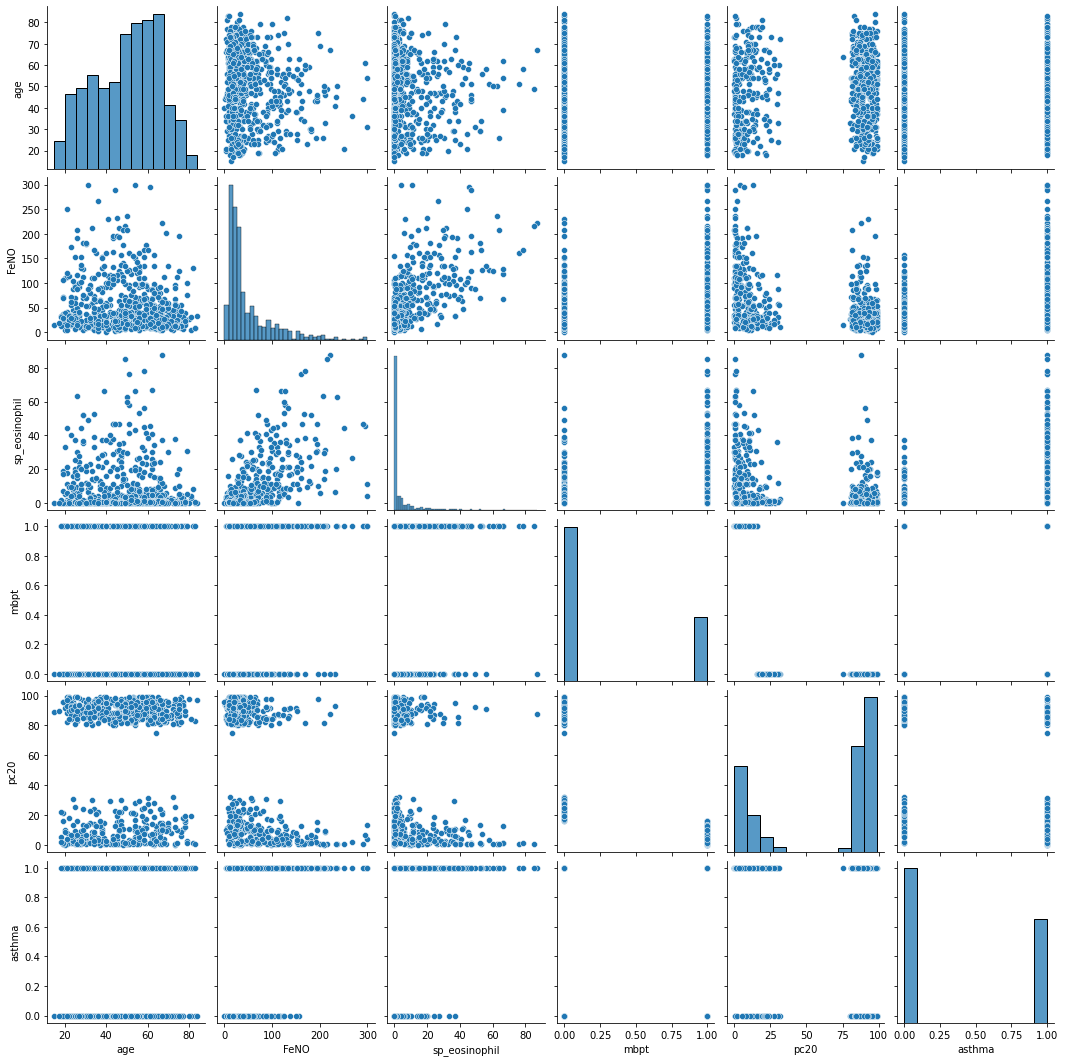

In [1]:
# %%
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

# %%
df_orig = pd.read_excel('../data/추가결과_이진영_20180907.xlsx', sheet_name='db')
display(df_orig.head())
# %%
df_orig.info()
# %%
df_orig.describe()

# %%
col = ['age', 'sex', 'FeNO', 'sp_eosinophil', 'mbpt', 'pc20', 'asthma']
df_orig[col]

# %%
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.pairplot(df_orig[col])
plt.show()

# %%
from sklearn.model_selection import train_test_split
col_m = ['FeNO', 'sp_eosinophil', 'mbpt', 'pc20']
y = df_orig['asthma'].values
X = df_orig[col_m].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1004, test_size=0.3)


In [2]:
from catboost import CatBoostClassifier

cat_column = 'mbpt'
xg_clf = CatBoostClassifier(task_type='GPU',
                            iterations=100)
# %%
xg_clf.fit(X_train, y_train, 
           verbose=False,
           plot=True)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print(xg_clf.score(X_train, y_train))
print(xg_clf.score(X_test, y_test))